<a href="https://colab.research.google.com/github/ahmeda335/Function_Calling/blob/main/Gemini_Google/Function_Calling_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Calling ***Gemini***  🤖
## Google provides the tool of function calling in some of its models, such that it uses the ability of understanding speech in its main model *gemini* in detecting the function to be called due to the user input.
---
# Notes:<br>
### 🔔 Make sure that you don't put any personal information, or passwords in the code in the unpaid sessions, as Google uses it to improve its AI performance.
### 🔔 For paid models you can find pricing information here ---> https://ai.google.dev/pricing.
---





### Install the SDK package.

In [ ]:
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 18.6 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai

### Configuring your API key.
✅ In the case of you are using colab, you can set your API-KEY in this way in the cell. If You are using any other development environment or cURL in the terminal it is preferred to put the API-KEY in an environment variable as shown in the next cell.<br>
✅ As I am using colab I will use the first method.<br><br>
You can get your Gemini API Key from here -->  https://aistudio.google.com/app/apikey

👇👇Put Your API-KEY here.<br>

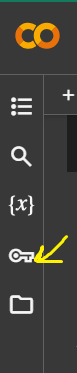

In [ ]:
from google.colab import userdata
API_KEY = userdata.get('GEMINI-API-KEY')

In [ ]:
# from dotenv import load_dotenv
# load_dotenv()

# !export GEMINI-API-KEY = <YOUR_API_KEY>   # Replace '<YOUR_API_KEY>' with you API-KEY. If you are using the terminal don't use '!' before 'export'.
# API_KEY = os.getenv('GEMINI-API-KEY')

In [ ]:
genai.configure(api_key=API_KEY)

### Detecting the model to be used from the available models that provide function calling.

In [ ]:
model_name = "models/gemini-1.5-flash-latest"  #@param["models/gemini-1.5-pro-latest", "models/gemini-1.5-flash-latest", "models/gemini-1.0-pro-001", "models/gemini-1.0-pro"]

###Initializing our functions
#### Note:
#### 🔔 Don't forget to make a docstring for each function which contains its definition, Arguments, types of its arguments, and the return value. <br>
#### 🔔 Try to describe each function as you can as the model uses this documentation to know what the function do, its parameters, their types, and the return values.

In [ ]:
# Do not forget to detect the types of the variables.

def video_downloader(video_url:str, video_quality:int):
  """
  Downloading a video from youtube using its url with the chosen quality.

  Args:
      video_url: The url of the video to be downloaded, this url is taken from youtube.
      video_quality: The quality of the video to be downloaded.

  Returns:
      A string showing that the video has been downloaded showing its quality.
  """

  print("Downloading video...")

  return f"video downloaded with quality {video_quality}"


def audio_downloader(audio_url:str, audio_quality:int):
  """
  Downloading an audio from youtube using its url with the chosen quality.

  Args:
      audio_url: The url of the audio to be downloaded, this url is taken from youtube.
      audio_quality: The quality of the audio to be downloaded.

  Returns:
      A string showing that the audio has been downloaded showing its quality.
  """

  print("Downloading audio...")

  return f"audio downloaded with quality {audio_quality}"


def playlist_downloader(playlist_url:str, playlist_quality:int=360):
  """
  Downloading an playlist from youtube using its url with the chosen quality.

  Args:
      playlist_url: The url of the playlist to be downloaded, this url is taken from youtube.
      playlist_quality: The quality of the playlist to be downloaded.

  Returns:
      A string showing that the playlist has been downloaded showing its quality.
  """

  print("Downloading playlist...")

  return f"playlist downloaded with quality {playlist_quality}"


functions = [video_downloader, audio_downloader, playlist_downloader]

###Declare functions during model initialization.
#### Note: <br>
#### 🔔 you can make the declaration of functions to the model manually, but here the model understands each function because I made a definition for each function.

In [ ]:
model = genai.GenerativeModel(model_name=model_name, tools=functions)

➡️ If you want to see the how the functions are described.<br>
➡️ Notice the required parameters in 'playlist_downloader' function and detect why!?

In [ ]:
model._tools.to_proto()

[function_declarations {
   name: "video_downloader"
   description: "\n  Downloading a video from youtube using its url with the chosen quality.\n\n  Args:\n      video_url: The url of the video to be downloaded, this url is taken from youtube.\n      video_quality: The quality of the video to be downloaded.\n\n  Returns:\n      A string showing that the video has been downloaded showing its quality.  \n  "
   parameters {
     type_: OBJECT
     properties {
       key: "video_quality"
       value {
         type_: INTEGER
       }
     }
     properties {
       key: "video_url"
       value {
         type_: STRING
       }
     }
     required: "video_url"
     required: "video_quality"
   }
 }
 function_declarations {
   name: "audio_downloader"
   description: "\n  Downloading an audio from youtube using its url with the chosen quality.\n\n  Args:\n      audio_url: The url of the audio to be downloaded, this url is taken from youtube.\n      audio_quality: The quality of the au

### Starting the chat session.
#### Note:
🔔 In my case I used some functions which downloads videos, audios, and playlists from youtube. There are already library 'pytube' which do this, and I didn't specify the exact shape of the parameters of the functions (quality, url). In practical examples, you can use libraries like 'pydantic' to detect the exact shape of the arguments of the functions.<br>
These are only guiding examples.

In [ ]:
# Call the API.
chat = model.start_chat()
response = chat.send_message("I want to download a video with url 'abc' ")
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "What quality do you want to download it in? \n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBLE"
            }
          ]
        }
      ],
      "usage_met

In [ ]:
done = False
fn = False

### Detecting if there are losed parameters and resuming the chat session.

➡️ Note that you have limits on using gemini models like how many requests per minute. <br>
Go to this website for more --> https://ai.google.dev/pricing

In [ ]:
# Print out each of the function calls requested from this single call.
fn = False
while not fn:
  if done == True:
        break
  for part in response.parts:
      responses = {}
      if fn := part.function_call:
          func = globals().get(fn.name)  # Enable me to use the name of the function as its corresponding function.
          func(**fn.args)
          # args = ", ".join(f"{key}={val}" for key, val in fn.args.items())
          # print(f"{fn.name}({args})")

          responses.update({fn.name: func(**fn.args)})
          done = True


      else:
          print(part.text, end="")
          chat.send_message(part.text)
          response = chat.send_message(input("try again: "))


# Build the response parts.
# if done is not True:
response_parts = [
    genai.protos.Part(function_response=genai.protos.FunctionResponse(name=fn, response={"result": val}))
    for fn, val in responses.items()
]

response = chat.send_message(response_parts)
print(response.text)


OK. I have downloaded the video with quality 15. 

